### Test del chi-cuadrado

En este ejercicio debemos diseñar, implementar y verificar una función que calcule el test de $\chi^2$ para comparar un histograma $H_1$ con un modelo dado por una distribución Binomial, f (x) ∼ B(n = 10, p = 0.4).

#### Inciso a

Para empezar, simulamos 100 observaciones de la V.A: binomial y calculamos las frecuencias de cada valor.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats.distributions import chi2
 
v_bin = np.random.binomial(10, 0.4, 100)

Calculamos las cuentas

Text(0.5, 0, 'Histograma de distribución binomial observada')

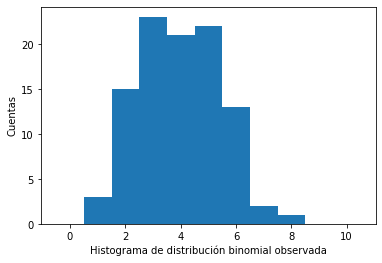

In [13]:
a = plt.hist(v_bin, bins = [i-.5 for i in range(12)])
plt.ylabel('Cuentas')
plt.xlabel('Histograma de distribución binomial observada')

In [14]:
a[0]  #son los conteos en cada bin

array([ 0.,  3., 15., 23., 21., 22., 13.,  2.,  1.,  0.,  0.])

Vemos que cada bin tiene un valor en cuentas, por lo tanto debemos pasarlos en frecuencas

In [15]:
v_obs = [a[0][i]/100 for i in range(11)]

In [16]:
v_obs

[0.0, 0.03, 0.15, 0.23, 0.21, 0.22, 0.13, 0.02, 0.01, 0.0, 0.0]

#### Inciso b

En este inciso debemos calcular el estadístico $\chi^2$ a artir del modelo y de los datos simulados.

Para empezar generamos los valores teóricos de una misma distribución binomial de parámetros n y p para cada elemento de una lista de rango 11 (que vaya de 0 a 10)

In [17]:
v_teo = []       
for i in range(11):
    vteo = binom.pmf(i,10,0.4)
    v_teo.append(vteo)

Text(0.5, 0, 'Curva de distribución binomial teórica con valores discretos')

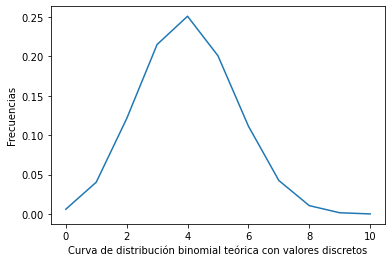

In [18]:
plt.plot(v_teo)
plt.ylabel('Frecuencias')
plt.xlabel('Curva de distribución binomial teórica con valores discretos')

Calculamos $\chi^2$

In [19]:
X = 0
for i in range(11):
    X = ((v_obs[i]-v_teo[i])**2)/v_teo[i] + X
    
print('chi = ',X)

chi =  0.04190481633897273


### Inciso c

Para hacer la prueba de hipótesis, tomamos como hipotesis nula $H_0$ que las dos muestras, tanto el de las frecuencias observadas como las teóricas, siguen la misma distribución. Nuestra hipótesis alternativa $H_1$ será el caso en que no la siguen. Para proseguir, consideramos un nivel de significancia del 95%. Como nuestro número de bines es  N = 11, significa que el grado de libertad es $\nu$ = N - 1 = 10. Esto nos permite calcular el $\chi^2_{\alpha,\nu}$, y si se cumple que $\chi^2$ < $\chi^2_{\alpha,\nu}$ entonces la hipotesis nula se acepta. De no ser esto último verdad, se rechaza.

Por tabla (http://www.ttable.org/chi-square-table.html) encontramos que $\chi^2_{\alpha,\nu}$ = 18.307, por lo que $H_0$ se cumple.

### Inciso d

Para este inciso debemos calcular el  $p-value$

El p-value se define como el área encerrada a la izquierda del valor crítico de la curva de densidad de probabilidades de $\chi^2$ a partir del $\chi^2_{observado}$. Para calcularlo entonces debemos saber a que valor de área corresponde el $\chi^2$ calculado como estadística de prueba.
Por tabla (http://www.ttable.org/chi-square-table.html) vemos que se corresponde a un valor de área 0.99. Lo verificamos con la función del chi2 del paquete de scipy.

In [56]:
p = 1-chi2.cdf(X,10)
print(p)

0.999999999966932


### Inciso e

Para este inciso debemos calcular muestras de 100 observaciones de una V.A. N(μ, σ), con σ=2.5 y μ que varı́e entre 2 y 7, estudiar cómo varı́a el valor-p y determinar si en algún rango de μ se puede “confundir” el modelo.

Generamos las distribuciones normales

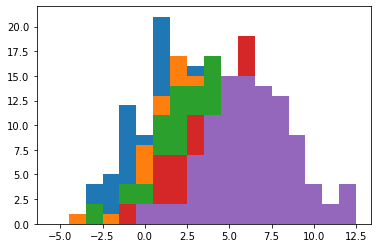

In [21]:
v_norm = []
for j in range(2,7):
    vnorm = np.random.normal(j,2.5,100)
    d = plt.hist(vnorm, bins = [i-.5 for i in range(-5,14)])
    v_norm.append(d)
    #print(v_norm)
    #print(' ')

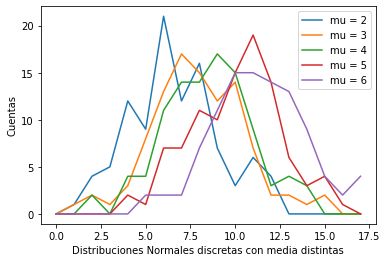

In [22]:
for k in range(len(v_norm)):
    plt.plot(v_norm[k][0], label='mu = '+ str(k+2))
    plt.ylabel('Cuentas')
    plt.xlabel('Distribuciones Normales discretas con media distintas')
    plt.legend()

Para calcular el p-value debemos saber como es $\chi$ de cada una de las distribuciones normales generadas con respecto a la teórica binomial. Usamos la cuenta de esta variable que construimos para calcular el estadístico de prueba cuando comparabamos la distribución observada binomial con la teórica.

In [23]:
v_teob = []       
for i in range(18):
    vteob = binom.pmf(i,10,0.4)
    v_teob.append(vteob)
    #print(i,vteob)

In [67]:
lista_chi = []

def chi(v_obs,v_teob):
    X=0
    for i in range(-5,13):
        if v_teob[i] != 0:
            X = ((v_obs[i+5]-v_teob[i])**2)/v_teob[i] + X
            
        else:
            continue
        
    lista_chi.append(X)

    print('chi = ',X)

Pasamos las cuentas de los bines de las listas generadas a frecuencias

In [68]:
lista_vnorm_f = []

for p in range(len(v_norm)):
    v_norm_f = [v_norm[p][0][h]/100 for h in range(18)]
    lista_vnorm_f.append(v_norm_f)

In [69]:
for i in range(5):
    lista = lista_vnorm_f[i]
    chi(lista,v_teob)

chi =  2.205732348091128
chi =  5.085733437962544
chi =  0.982133529826658
chi =  16.402337056133643
chi =  22.04635659187729


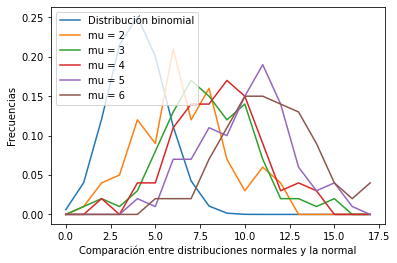

In [70]:
plt.plot(v_teob, label='Distribución binomial')
plt.ylabel('Frecuencias')
plt.xlabel('Comparación entre distribuciones normales y la normal')
for i in range(5):
    plt.plot(lista_vnorm_f[i], label='mu = '+ str(i+2))
    plt.legend()
    

Ahora calculemos el p-value para ver como varía según la distribución normal comparada.

In [71]:
lista_pvalue = []
for i in range(5):
    p_v = 1-chi2.cdf(lista_chi[i],10)
    lista_pvalue.append(p_v)
    print(p_v)

0.9945062843237288
0.8853777931392155
0.9998415594688693
0.08867977859511056
0.014870176974328242


Vemos que con las distribuciones normales con μ más chico el p-value es mas grande y con las de μ más grande p-value es más chico. Esto es de esperar porque cuando más grande es μ, más se aleja la distribución normal con respecto a la del modelo, lo que hace más rechazable la hipítesis nula. 
Respondiendo a la consigna con lo analizado antes se puede decir que dentro de un rango de μ entre 2 y 5 el modelo se puede confundir.

### Inciso f

En este inciso debemos sumilar una muestra de 10000 realizaciones de una variable aleatoria con $f(x) ∼ B(n = 1000, p = 0.4$ y repetir el punto anterior.

In [57]:
v_bin2 = np.random.binomial(1000, 0.4, 10000)

Text(0.5, 0, 'Histograma de distribución binomial observada con parámetros n=1000 y p=0,4')

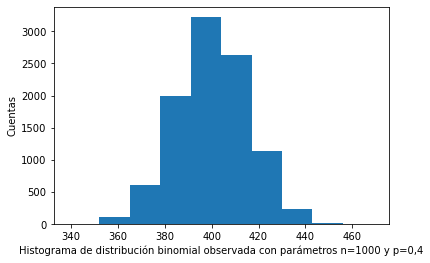

In [58]:
b = plt.hist(v_bin2)
plt.ylabel('Cuentas')
plt.xlabel('Histograma de distribución binomial observada con parámetros n=1000 y p=0,4')

In [91]:
v_obs2 = [b[1][i]/1000 for i in range(len(b[0]))]

In [92]:
v_teo2 = []       
for i in range(len(b[0])):
    vteo2 = binom.pmf(i,10,0.4)
    v_teo2.append(vteo2)

In [93]:
#plt.plot(v_obs2, label='Binomial con parámetro n=1000 y p=0.4')
#plt.plot(v_teo2, label='Teórica binomial con n=10 y p=0.4')

In [95]:
X = 0
for i in range(len(b[0])):
    X = ((v_obs2[i]-v_teo2[i])**2)/v_teo2[i] + X
    
print('chi = ',X)

chi =  174.91927768364064


In [98]:
p = 1-chi2.cdf(X,10)
print(p)

0.0
